# **Introduction to Sionna RT**
Sionna RT is a open-source hardware-accelerated differentiable ray tracer for radio propagation modeling which is built on top of Mitsuba 3. 
In this notebook I have experimented with different functions of Sionna

In [1]:
import sionna.rt

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

no_preview = False #Toggle to use the preview widget

#Relevent components from Sionna
from sionna.rt import load_scene, PlanarArray, Transmitter, Receiver, Camera,\
    PathSolver, RadioMapSolver, subcarrier_frequencies


## **Scenes**

### **Loading and Visualizing**

In [2]:
#Load integrated scene
scene = load_scene(sionna.rt.scene.munich)

In [3]:
if not no_preview:
    scene.preview()

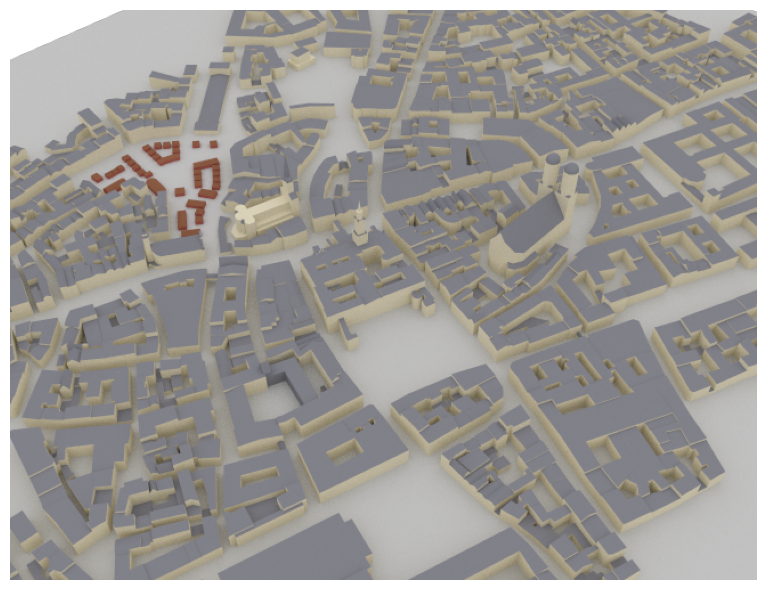

In [4]:
if not no_preview:
    scene.render(camera="preview",
                 num_samples=512)

In [5]:
if not no_preview:
    scene.render_to_file(camera="preview",
                         filename="scene.png",
                         resolution=[650, 500]);

Number of Samples means, number of rays thrown per pixel

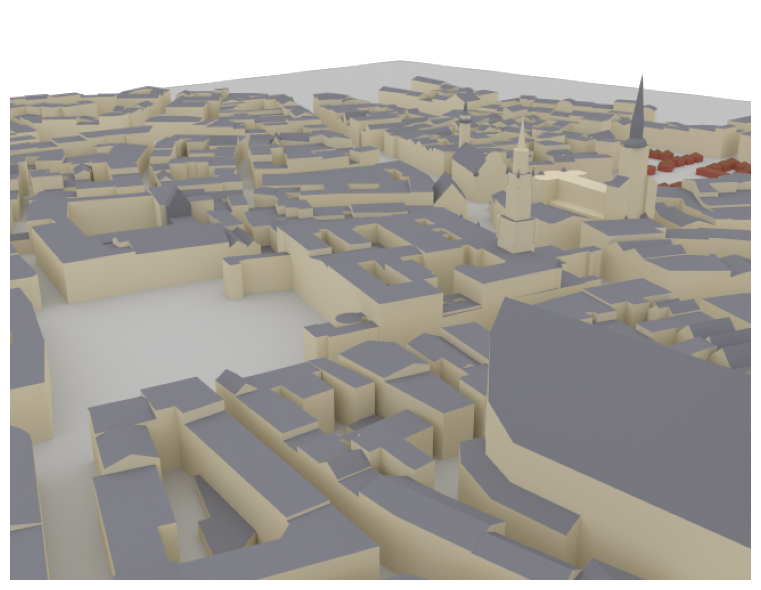

In [10]:
#Create a new Camera with a different configuration
my_cam = Camera(position=[-250, 250, 150], look_at=[-25,30,28])

#Render the scene with new camera*
scene.render(camera=my_cam, resolution=[650,500], num_samples=4096); #increase number of samples to increase quality
scene.render_to_file(camera=my_cam, filename="scene2.jpg", resolution=[2048, 1024]);


### **Inspecting SceneObjects and Editing of Scenes**

In [12]:
scene = sionna.rt.load_scene(sionna.rt.scene.simple_street_canyon, merge_shapes=False)
# scene.preview()
scene.objects

{'building_1': <sionna.rt.scene_object.SceneObject at 0x7dced8458520>,
 'building_6': <sionna.rt.scene_object.SceneObject at 0x7dced84592a0>,
 'building_5': <sionna.rt.scene_object.SceneObject at 0x7dced8458b50>,
 'building_4': <sionna.rt.scene_object.SceneObject at 0x7dced8458160>,
 'building_3': <sionna.rt.scene_object.SceneObject at 0x7dced8458820>,
 'building_2': <sionna.rt.scene_object.SceneObject at 0x7dced84587c0>,
 'floor': <sionna.rt.scene_object.SceneObject at 0x7dced845ba60>}

In [13]:
floor = scene.get("floor")

In [15]:
print("Position (x,y,z) [m]:", floor.position)
print("Orientation (alpha, beta, gamma) [rad]:", floor.orientation)
print("Scaling:" , floor.scaling)


Position (x,y,z) [m]: [[-0.769669, 0.238537, -0.0307941]]
Orientation (alpha, beta, gamma) [rad]: [[0, 0, 0]]
Scaling: [[1, 1, 1]]


### **Velocity Vector**
This property is used during the ray tracing process to compute a Doppler shift for every propagation path. This information can then be used to synthetically compute time evolution of channel impulse responses.

In [16]:
print("Velocity (x,y,z) [m/s]: ", floor.velocity)

Velocity (x,y,z) [m/s]:  [[0, 0, 0]]


The radio material determines how an object interacts with incident radio waves.

In [17]:
floor.radio_material

ITURadioMaterial type=concrete
                 eta_r=5.240
                 sigma=0.123
                 thickness=0.100
                 scattering_coefficient=0.000
                 xpd_coefficient=0.000

Depending on the type of radio material, some of its properties might change as a function of the frequency of the incident radio wave:

In [18]:
scene.frequency = 28e9 # in Hz; implicitly updates RadioMaterials that implement frequency dependent properties
floor.radio_material # Note that the conductivity (sigma) changes automatically

ITURadioMaterial type=concrete
                 eta_r=5.240
                 sigma=0.626
                 thickness=0.100
                 scattering_coefficient=0.000
                 xpd_coefficient=0.000